# Regras

- Pegar uma caracteristica para usar e outra para ser alvo
- Dividir o conjunto entre treino (70%) e  teste (30%)
- Fazer o teste
    - y_pred = b0 + bix
- Avaliar os resultados
    RMSE

## Etapa 1 - Definir Target e Character

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv("regression_dataset.csv")
df

,profit,morning,after_noon,night,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,...,March,April,May,June,July,August,September,October,November,December
0,0.90,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,3.60,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2.40,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.15,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,6.00,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
234000,0.15,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
234001,1.20,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
234002,0.30,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
234003,1.30,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [3]:
aux = pd.read_csv("dataset.csv")
aux

,Unnamed: 0,date,time,ticket_number,article,Quantity,unit_price
0,0,2021-01-02,08:38,150040.0,BAGUETTE,1.0,"0,90 €"
1,1,2021-01-02,08:38,150040.0,PAIN AU CHOCOLAT,3.0,"1,20 €"
2,4,2021-01-02,09:14,150041.0,PAIN AU CHOCOLAT,2.0,"1,20 €"
3,5,2021-01-02,09:14,150041.0,PAIN,1.0,"1,15 €"
4,8,2021-01-02,09:25,150042.0,TRADITIONAL BAGUETTE,5.0,"1,20 €"
...,...,...,...,...,...,...,...
234000,511387,2022-09-30,18:52,288911.0,COUPE,1.0,"0,15 €"
234001,511388,2022-09-30,18:52,288911.0,BOULE 200G,1.0,"1,20 €"
234002,511389,2022-09-30,18:52,288911.0,COUPE,2.0,"0,15 €"
234003,511392,2022-09-30,18:55,288912.0,TRADITIONAL BAGUETTE,1.0,"1,30 €"


In [4]:
target = df["profit"]
target

0         0.90
1         3.60
2         2.40
3         1.15
4         6.00
          ... 
234000    0.15
234001    1.20
234002    0.30
234003    1.30
234004    1.30
Name: profit, Length: 234005, dtype: float64

In [5]:
aux["unit_price"] = aux["unit_price"].apply(lambda x: float(x.replace("€", "").replace(",", ".")))
character = aux["unit_price"]
character

0         0.90
1         1.20
2         1.20
3         1.15
4         1.20
          ... 
234000    0.15
234001    1.20
234002    0.15
234003    1.30
234004    1.30
Name: unit_price, Length: 234005, dtype: float64

In [6]:
def my_sum(array: list) -> int | float:
    value = 0

    for number in array:
        value += number

    return value

In [7]:
def my_mean(array: list) -> float:
    
    mean = my_sum(array)

    mean = mean/len(array)

    return mean

In [8]:
def calc_beta_one(character: np.ndarray, target: np.ndarray) -> float:
    x = character
    y = target
    x_mean = my_mean(x)
    y_mean = my_mean(y)

    x_y = (x - x_mean) * (y - y_mean)
    x_x = (x - x_mean) ** 2

    beta_one = my_sum(x_y) / my_sum(x_x)
    return beta_one

In [9]:
def calc_beta_zero(mean_y: float, beta_one, mean_x: float) -> float:
    """
    Cacula Beta Zero

    - Args:
        - mean_y:: Media dos valores da coluna alvo
        - beta_one:: Coeficiente angular
        - mean_x:: Media dos valores da coluna caracteristica
    """

    return mean_y - beta_one * mean_x

In [10]:
def train(beta_zero, beta_one, x):

    data = []

    for value in x:
        data.append(beta_zero + beta_one * value)

    return data

In [11]:
x, y = np.array(character), np.array(target)
beta_one = calc_beta_one(x, y)
beta_one

np.float64(1.0562236123693485)

In [12]:
beta_zero = calc_beta_zero(
    mean_y=my_mean(np.array(target)),
    beta_one=beta_one,
    mean_x=my_mean(np.array(character))
)
beta_zero

np.float64(0.631653942623946)

# Etapa 2 - Dividir a Base em 70 - 30

In [13]:
all_values = len(target)
all_values

234005

## 2-1 Dividindo a Base em 70 - 30

In [14]:
num_train = int(
    round(
        0.7 * all_values,
        0
       )
)
num_train

163804

In [15]:
x_data = np.array(character)
y_data = np.array(target)

In [16]:
x_train = x_data[:num_train]
x_test = x_data[num_train:]

y_train = y_data[:num_train]
y_test = y_data[num_train:]

## Etapa 3-1 - Fazer o treino com 70%

In [17]:
beta_one_train = calc_beta_one(x_train, y_train)
beta_one_train

np.float64(1.0511214344805064)

In [18]:
beta_zero_train = calc_beta_zero(
    mean_y=my_mean(y_train),
    beta_one=beta_one_train,
    mean_x=my_mean(x_train)
)
beta_zero_train

np.float64(0.6108120058729305)

In [19]:
pred_train = beta_zero_train + beta_one_train * x_train
pred_train


array([1.5568213 , 1.87215773, 1.87215773, ..., 4.28973703, 1.97726987,
       1.9247138 ])

In [20]:
pred_train = train(beta_zero=beta_zero_train, beta_one=beta_one_train, x=x_train)
pred_train

[np.float64(1.5568212969053863),
 np.float64(1.8721577272495382),
 np.float64(1.8721577272495382),
 np.float64(1.8196016555255128),
 np.float64(1.8721577272495382),
 np.float64(1.5568212969053863),
 np.float64(1.7670455838014876),
 np.float64(1.7144895120774624),
 np.float64(1.8721577272495382),
 np.float64(1.7670455838014876),
 np.float64(1.8721577272495382),
 np.float64(1.7670455838014876),
 np.float64(1.8721577272495382),
 np.float64(1.7670455838014876),
 np.float64(1.7670455838014876),
 np.float64(1.8721577272495382),
 np.float64(1.8721577272495382),
 np.float64(1.8196016555255128),
 np.float64(1.2414848665612344),
 np.float64(3.133503448626146),
 np.float64(0.7684802210450065),
 np.float64(1.8721577272495382),
 np.float64(4.289737026554703),
 np.float64(2.8181670182819945),
 np.float64(1.8196016555255128),
 np.float64(1.8721577272495382),
 np.float64(1.7144895120774624),
 np.float64(1.7670455838014876),
 np.float64(1.8721577272495382),
 np.float64(1.7670455838014876),
 np.float64(

## 3-2 - Fase de teste com os 30%

In [21]:
beta_one_test = calc_beta_one(x_test, y_test)
beta_one_test

np.float64(1.06496062047965)

In [22]:
beta_zero_test = calc_beta_zero(
    mean_y=my_mean(y_test),
    beta_one=beta_one_test,
    mean_x=my_mean(x_test)
)
beta_zero_test

np.float64(0.6846797943316196)

In [23]:
pred_test = beta_zero_test + beta_one_test * x_test
pred_test

array([1.69639238, 2.9210971 , 3.02759316, ..., 0.84442389, 2.0691286 ,
       2.0691286 ])

## Etapa 4 - Avaliação

In [24]:
def my_sqrt(value: float):

    return value ** (1/2)

In [25]:
def rmse(y_test: np.ndarray, y_pred: np.ndarray, y_num_values: int):
    """
    calculo dos resultados pela raiz media quadrada do erro
    """

    soma = 0

    for idx in range(len(y_test)):

        soma += ((y_test[idx] - y_pred[idx]) ** 2)



    return my_sqrt(soma * (1 / y_num_values))


In [26]:
result = rmse(y_test, pred_test, len(y_test))
result

np.float64(1.9609075788870962)

In [27]:
x_train.shape

(163804,)

In [28]:
y_train.shape

(163804,)

In [29]:
def my_scatter_plot(x, y, beta_one, beta_zero ):
    min_value = min(x)
    max_value = max(x)

    a = np.linspace(min_value, max_value, len(x_train))
    b = beta_one * a + beta_zero

    plt.plot(a, b, "-r")
    plt.scatter(x, y)


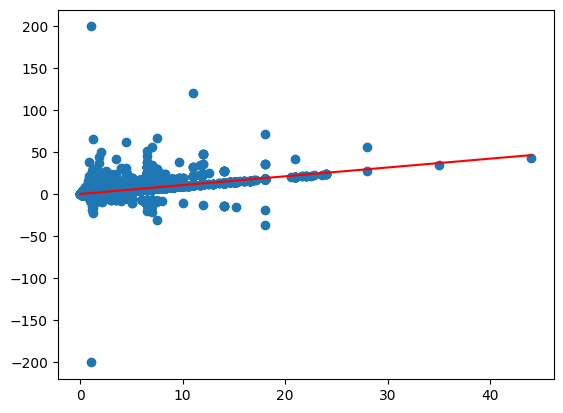

In [30]:
my_scatter_plot(x_train, y_train,beta_one_train, beta_zero_train)

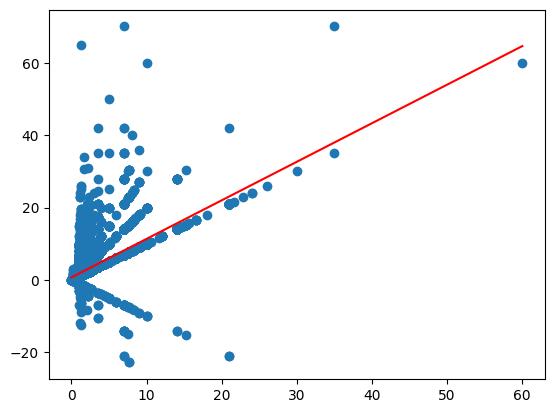

In [31]:
my_scatter_plot(x_test, y_test,beta_one_test, beta_zero_test)

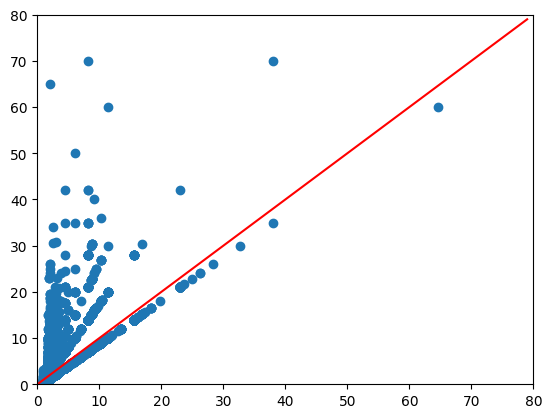

In [32]:
plt.scatter(pred_test, y_test)
plt.xlim([0,80])
plt.ylim([0,80])
plt.plot(range(0,80), range(0,80), "-r")

In [33]:
print(f"X Min {min(x)}\nX Max {max(x)}\nY Min {min(y)}\n Y Max {max(y)}\n")

X Min 0.0
X Max 60.0
Y Min -200.0
 Y Max 200.0



In [34]:
print(f"X Min {min(x_train)}\nX Max {max(x_train)}\nY Min {min(y_test)}\nY Max {max(y_test)}\n")

X Min 0.0
X Max 44.0
Y Min -22.8
Y Max 70.0



In [35]:
print(f"X Min {min(x_test)}\nX Max {max(x_test)}\nY Min {min(y_test)}\nY Max {max(y)}")

X Min 0.0
X Max 60.0
Y Min -22.8
Y Max 200.0


In [36]:
def my_train(x_train, y_train):
    beta_one = calc_beta_one(x_train, y_train)
    beta_zero = calc_beta_zero(mean_y=my_mean(y_train), beta_one=beta_one, mean_x=my_mean(x_train))
    return beta_zero, beta_one

In [37]:
def my_predict(beta_one, beta_zero, x_test):
    return beta_zero + beta_one * x_test

In [38]:
def my_mrse(pred_y, y_test):
    erro = 0

    for i in range(len(pred_y)):

        erro += (pred_y[i] - y_test[i]) ** 2

    erro = (erro/len(pred_y)) ** 0.5
    return erro

In [39]:
def my_variance(values):
    mean = my_mean(values)

    variance = 0

    for value in values:

        variance += (value - mean) ** 2

    variance /= len(values)

    return variance

In [40]:
def my_std(values):

    variance = my_variance(values)

    return variance ** 0.5

In [41]:
errors = []

for _ in range(10):

    x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, train_size=0.7)

    beta_zero, beta_one = my_train(x_train, y_train)
    pred_test = my_predict(beta_one, beta_zero, x_test)

    error = my_mrse(pred_test, y_test)

    errors.append(error)



    print(f"Beta Zero: {beta_zero}\n Beta One: {beta_one}\n RMSE: {error}\n\n\n\n")


print(f"\n Média do erro: {my_mean(errors)}\nDesvio do erro: {my_std(errors)}")
    

Beta Zero: 0.6251205526201298
 Beta One: 1.063348130716576
 RMSE: 1.9218938321395427




Beta Zero: 0.6284720437993672
 Beta One: 1.0572723963195196
 RMSE: 2.148785513831148




Beta Zero: 0.6171522280258435
 Beta One: 1.0667552285671975
 RMSE: 1.7729500877879374




Beta Zero: 0.6316898324305644
 Beta One: 1.0571510858951458
 RMSE: 1.9404200352429979




Beta Zero: 0.6327502813848667
 Beta One: 1.0549980762690412
 RMSE: 1.9705800375775668




Beta Zero: 0.6337238157886527
 Beta One: 1.056587935918052
 RMSE: 1.968437852555201




Beta Zero: 0.625228240906277
 Beta One: 1.0626716031487138
 RMSE: 1.975822719535096




Beta Zero: 0.6357930615689642
 Beta One: 1.0531967331840661
 RMSE: 1.9809986150593495




Beta Zero: 0.631691858769166
 Beta One: 1.0549299935333831
 RMSE: 1.9125762718478998




Beta Zero: 0.6344961759562981
 Beta One: 1.0549730391933656
 RMSE: 1.9194572894280613





 Média do erro: 1.9511922255004799
Desvio do erro: 0.0874382537764388


In [44]:
def my_calc_error(x_train, y_train, x_test, y_test) -> float:
        """
        """
        beta_zero, beta_one = my_train(x_train, y_train)
        
        pred_test = my_predict(beta_one, beta_zero, x_test)

        error = my_mrse(pred_test, y_test)

        return error
 

def show_results(errors: list[float]) -> None:
        
        print(f"\n Média do erro: {my_mean(errors)}\nDesvio do erro: {my_std(errors)}")

## Aplicar o K-FOLD na Base

In [49]:
from random import shuffle

def k_fold(data: np.ndarray, target: np.ndarray, k: int=5, random: bool=True):
    # Embaralhar os dados
    if random:
        combined = list(zip(data, target))
        shuffle(combined)
        data[:], target[:] = zip(*combined) # * serve pra descompactar a lista de tuplas para o zip conseguir remontar os dados
        

    fold_size = len(data) // k
    errors = []

    for i in range(k):
        start = i * fold_size
        end = (i + 1) * fold_size

        x_test = data[start:end]
        y_test = target[start:end]

        x_train = np.concatenate([data[:start], data[end:]]) # Seleciona os dados de treino para o fold atual. Pega todos os dados antes do índice start e todos os dados após o índice end, e os concatena.
        y_train = np.concatenate([target[:start], target[end:]]) # Seleciona os alvos de treino para o fold atual. Pega todos os alvos antes do índice start e todos os alvos após o índice end, e os concatena.
        
        errors.append(my_calc_error(x_train, y_train, x_test, y_test))


    return errors


In [52]:
errors = k_fold(x_data, y_data, k=10)

show_results(errors)


 Média do erro: 1.8983697120170806
Desvio do erro: 0.17029480071206549
